 # Watershed algorithm - teeth area detection

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def imshow(img, cmap='gray'):
    plt.figure()
    if cmap is None:
        plt.imshow(img)
    else:
        plt.imshow(img, cmap=cmap)


 ## Load image

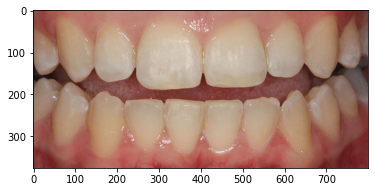

In [3]:
img = cv2.imread('./frontal_teeth_2.jpg')
# img = cv2.imread('./frontal_teeth_1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)


 ## Image preprocessing
 * Convert to gray image
 * Perform adaptive thresholding
 * Perform morphology (dilation and erosion)

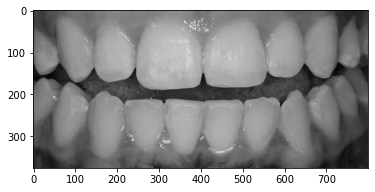

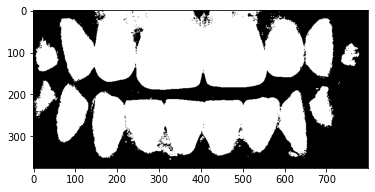

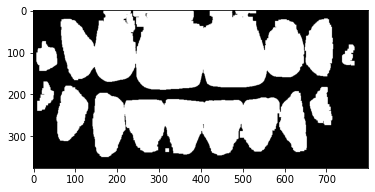

In [4]:
def image_preprocessing(img):
    # img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img_gray = img[:,:, 1]
    imshow(img_gray)

    # also remove noise
    # img_gray = cv2.GaussianBlur(img_gray, (5,5), cv2.BORDER_DEFAULT)
    # imshow(img_gray)

    # img_gray = cv2.bitwise_not(img_gray)
    # imshow(img_gray)

    # 64*2.5-1 untuk gambar gigi 1
    # 64*2-1 untuk gambar gigi 2
    _, img_gray = cv2.threshold(img_gray, 64*2-1, 255, cv2.ADAPTIVE_THRESH_MEAN_C)
    imshow(img_gray)

    # remove noise
    img_gray = cv2.morphologyEx(img_gray, cv2.MORPH_OPEN, np.ones((5,5),np.uint8), iterations=2)
    imshow(img_gray)

    return img_gray

img_gray = image_preprocessing(img)

 ## Select background

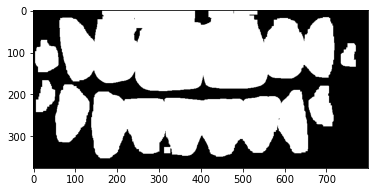

In [5]:
kernel = np.ones((3,3),np.uint8)
sure_bg = cv2.dilate(img_gray, kernel, iterations = 3)
imshow(sure_bg)


 ## Select foreground

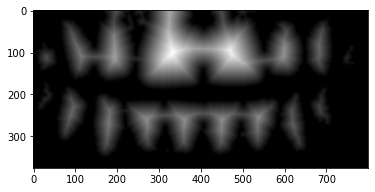

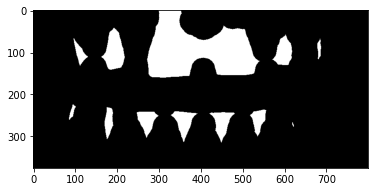

In [6]:
dist_transform = cv2.distanceTransform(img_gray, cv2.DIST_L2, 5)
# threshold = 40% dari dist_transform
ret, sure_fg = cv2.threshold(dist_transform, 0.35 * dist_transform.max(), 255, 0)
imshow(dist_transform)
imshow(sure_fg)


 ## Select ambigious area
 Between selected foreground and background area

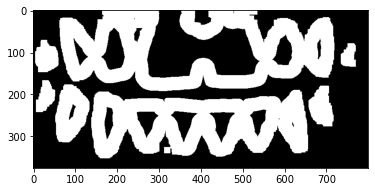

In [7]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)
imshow(unknown)


 ## Marker labeling

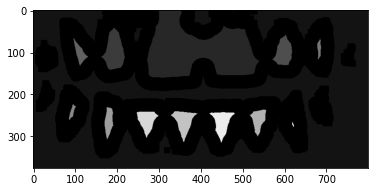

In [8]:
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1 # make sure background isn't 0, but 1
markers[unknown==255] = 0 # mark region of uknown with 0 (black)
imshow(markers)


 ## Watershed Algorithm

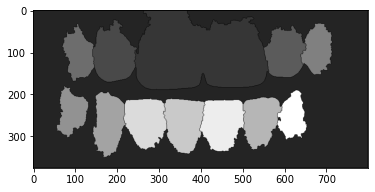

In [9]:
markers = cv2.watershed(img, markers)
imshow(markers)


 ## Find area with contours detection

In [10]:
contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
print(f'Total contour : {len(contours)}')
# print('Countour details :')
# print(contours)
print(f'Total hierarchy : {len(hierarchy[0])}')
print('Hierarchy details :')
print(hierarchy[0])


Total contour : 16
Total hierarchy : 16
Hierarchy details :
[[ 1 -1 -1 -1]
 [ 2  0 -1 -1]
 [ 3  1 -1 -1]
 [ 4  2 -1 -1]
 [ 5  3 -1 -1]
 [ 6  4 -1 -1]
 [ 7  5 -1 -1]
 [ 8  6 -1 -1]
 [ 9  7 -1 -1]
 [10  8 -1 -1]
 [11  9 -1 -1]
 [12 10 -1 -1]
 [13 11 -1 -1]
 [14 12 -1 -1]
 [15 13 -1 -1]
 [-1 14 -1 -1]]


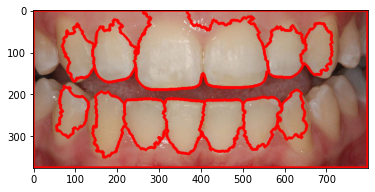

In [11]:
border_contours = img.copy()
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(border_contours, contours, i, (255,0,0), thickness=4)
plt.figure()
plt.imshow(border_contours)

